In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
base_path = f"data/Exp2_GuyGilad_logs_yolo"
input_bboxes_path = f"{base_path}/bboxes2.csv"

In [3]:
from sim.simulator import *
from sim.sim_controllers import *
from sim.config import *

experiment_config = ExperimentConfig.load_json(f"{base_path}/experiment_config.json")
# yolo_config = YoloConfig.load_json(f"{base_path}/yolo_config.json")

time_config = TimingConfig(
    imaging_time_ms=100,
    pred_time_ms=15,
    moving_time_ms=50,
    camera_size_mm=(4, 4),
    micro_size_mm=(0.22, 0.22),
    experiment_config=experiment_config,
)

log_config = LogConfig(
    root_folder="logs",
    save_mic_view=False,
    save_cam_view=False,
    save_err_view=False,
)

In [4]:
from pprint import pprint
pprint(time_config)

TimingConfig(px_per_mm=92,
             mm_per_px=0.010869565217391304,
             frames_per_sec=60,
             ms_per_frame=16.666666666666668,
             imaging_time_ms=100,
             imaging_frame_num=6,
             pred_time_ms=15,
             pred_frame_num=1,
             moving_time_ms=50,
             moving_frame_num=3,
             camera_size_mm=(4, 4),
             camera_size_px=(368, 368),
             micro_size_mm=(0.22, 0.22),
             micro_size_px=(20, 20))


In [5]:
from eval.analysis2 import Plotter2

pltr = Plotter2(
    time_config,
    log_paths=[
        "/home/yashlat/source/Bio-Proj/data/Exp0_GuyGilad_logs_yolo/bboxes2.csv",
        "/home/yashlat/source/Bio-Proj/data/Exp1_GuyGilad_logs_yolo/bboxes2.csv",
        "/home/yashlat/source/Bio-Proj/data/Exp2_GuyGilad_logs_yolo/bboxes2.csv",
        "logs/bboxes.csv",
    ],
    plot_height=10,
)

pltr.initialize(
    n=10,
    imaging_only=True,
    unit="sec",
    #    legal_bounds=(1000, 1000, 12000, 12000),
)

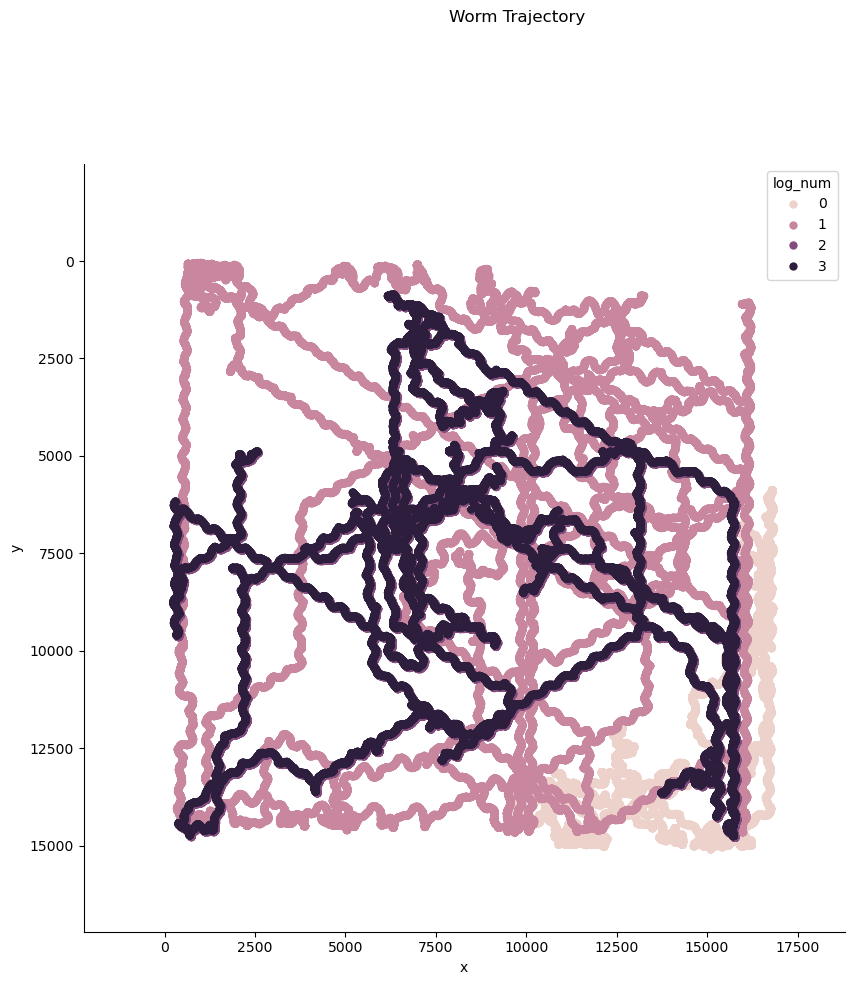

In [6]:
pltr.plot_trajectory(hue_col="log_num", condition=lambda x: x["wrm_y"] >= 0)

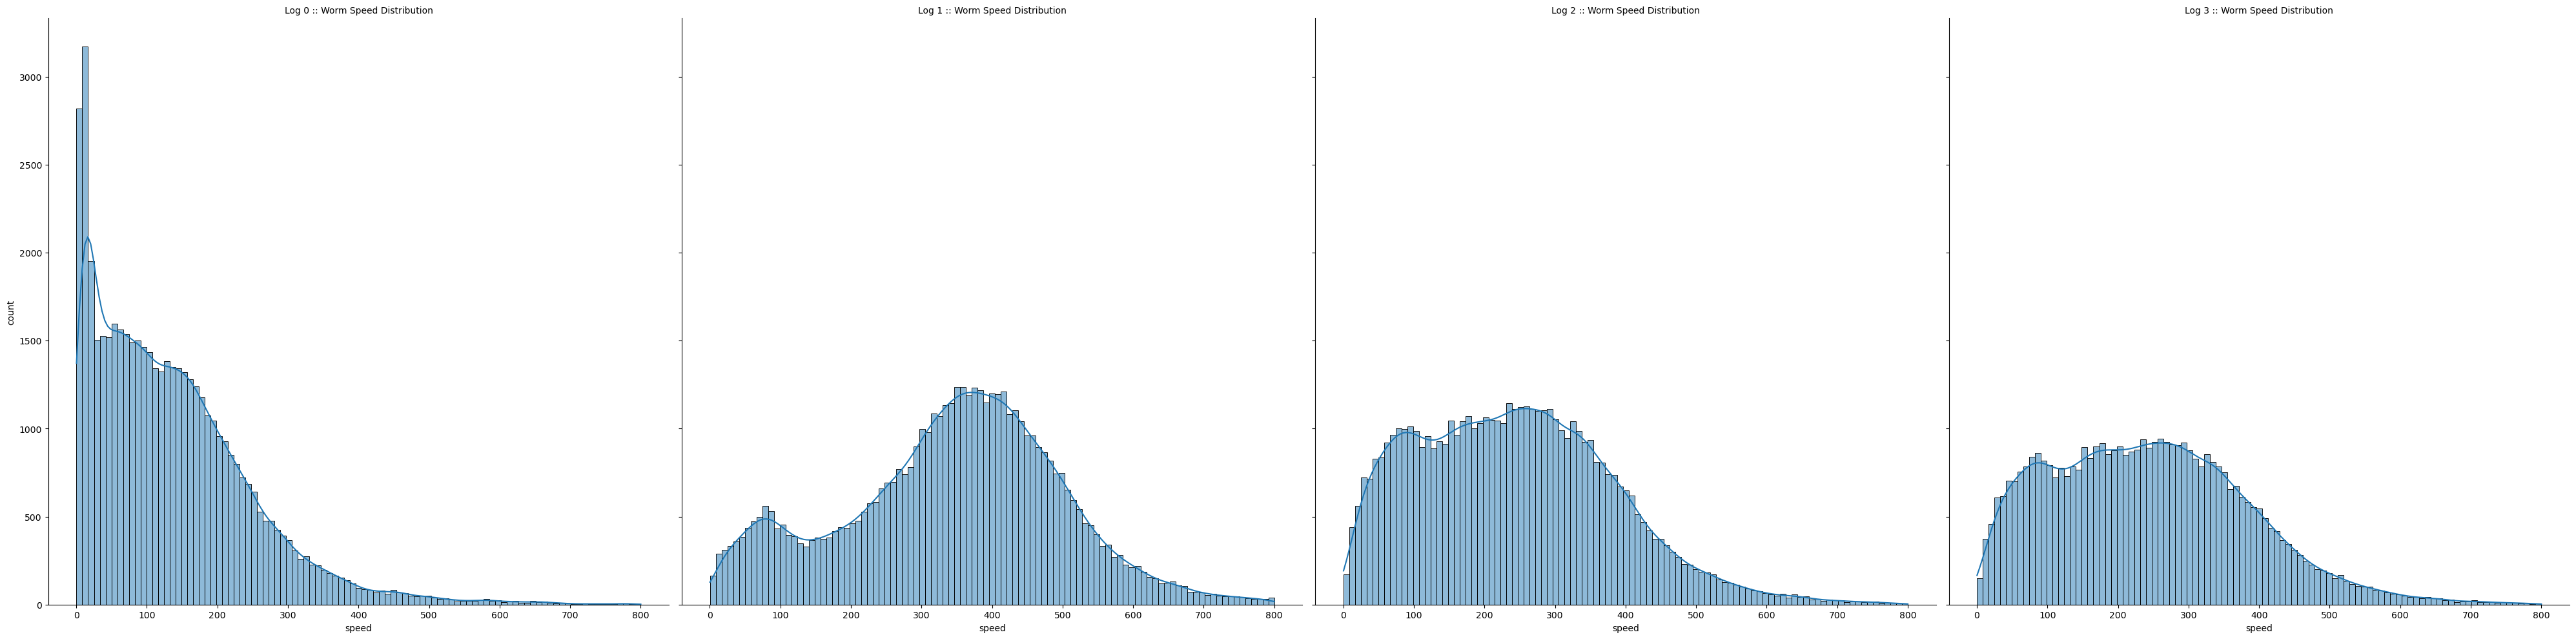

In [7]:
pltr.plot_speed(log_wise=True, condition=lambda x: x["wrm_speed"] <= 800)

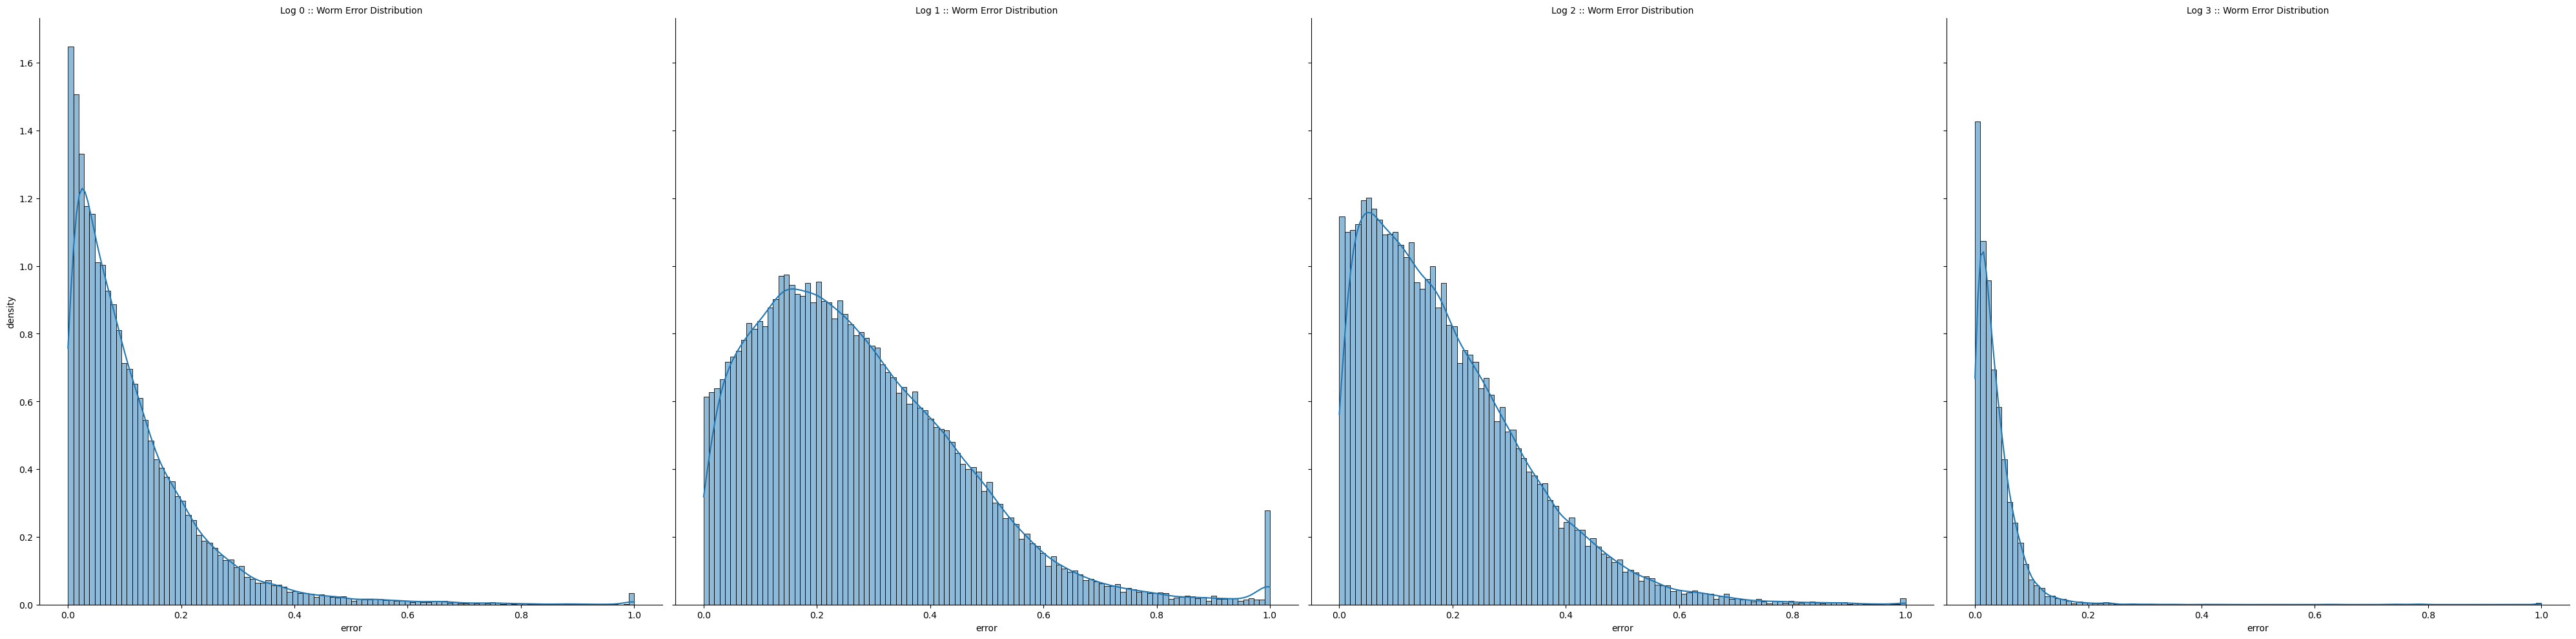

In [8]:
pltr.plot_error(log_wise=True, error_kind="bbox", condition=lambda x: x["bbox_error"] > 1e-5)

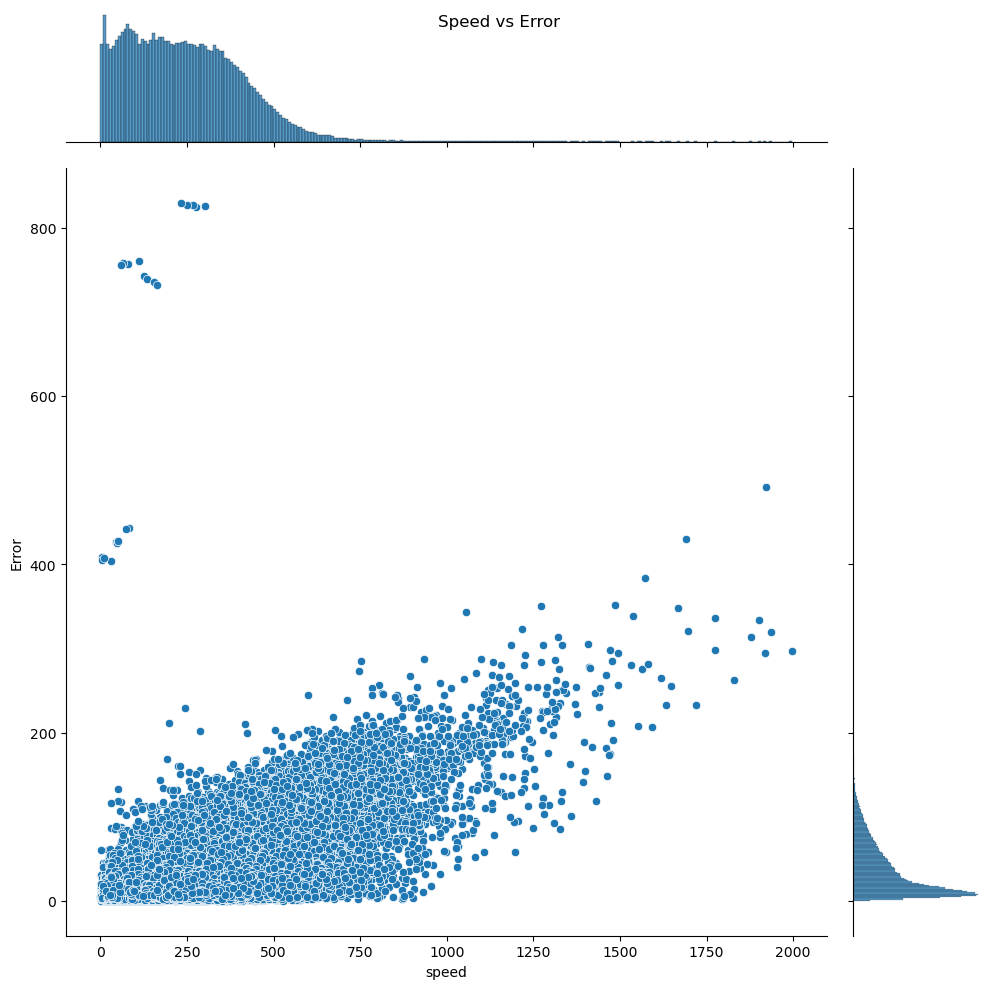

In [9]:
pltr.plot_speed_vs_error(error_kind="dist", condition=lambda x: x["wrm_speed"] < 2000)

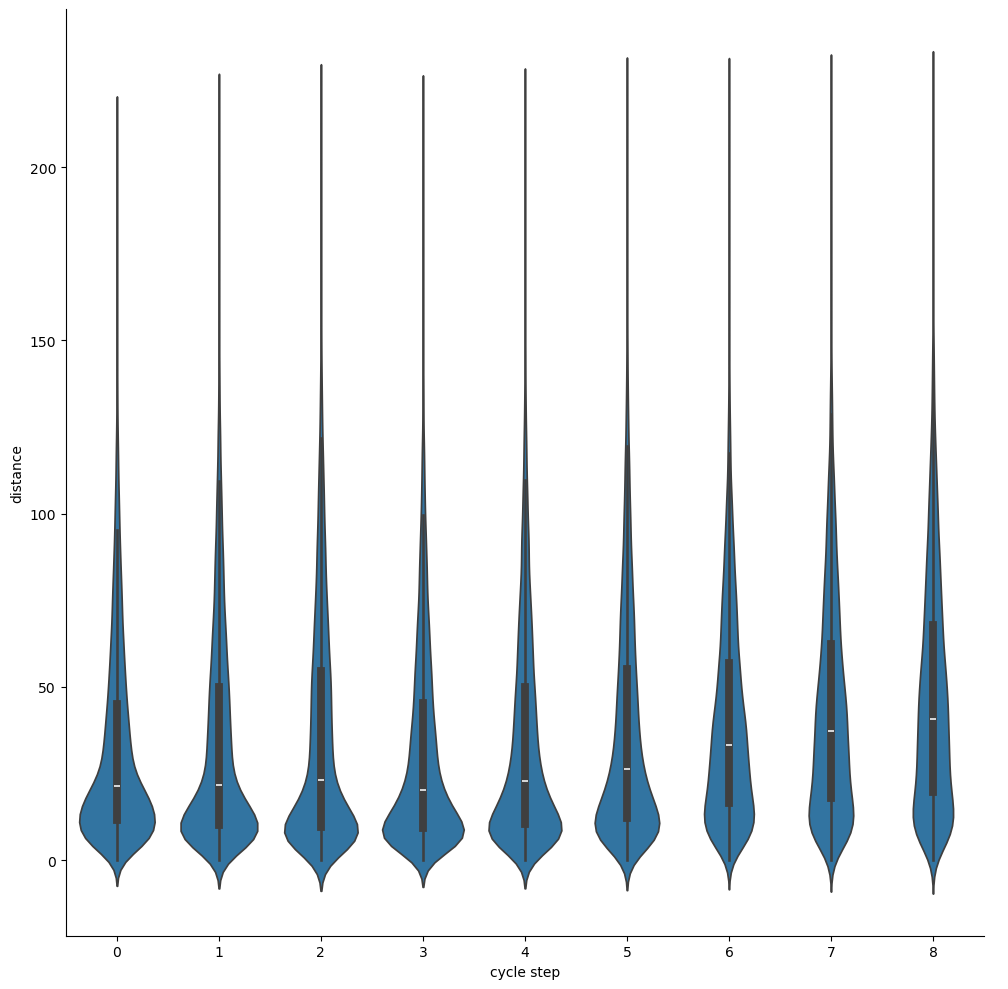

In [10]:
pltr.plot_deviation(percentile=0.999)

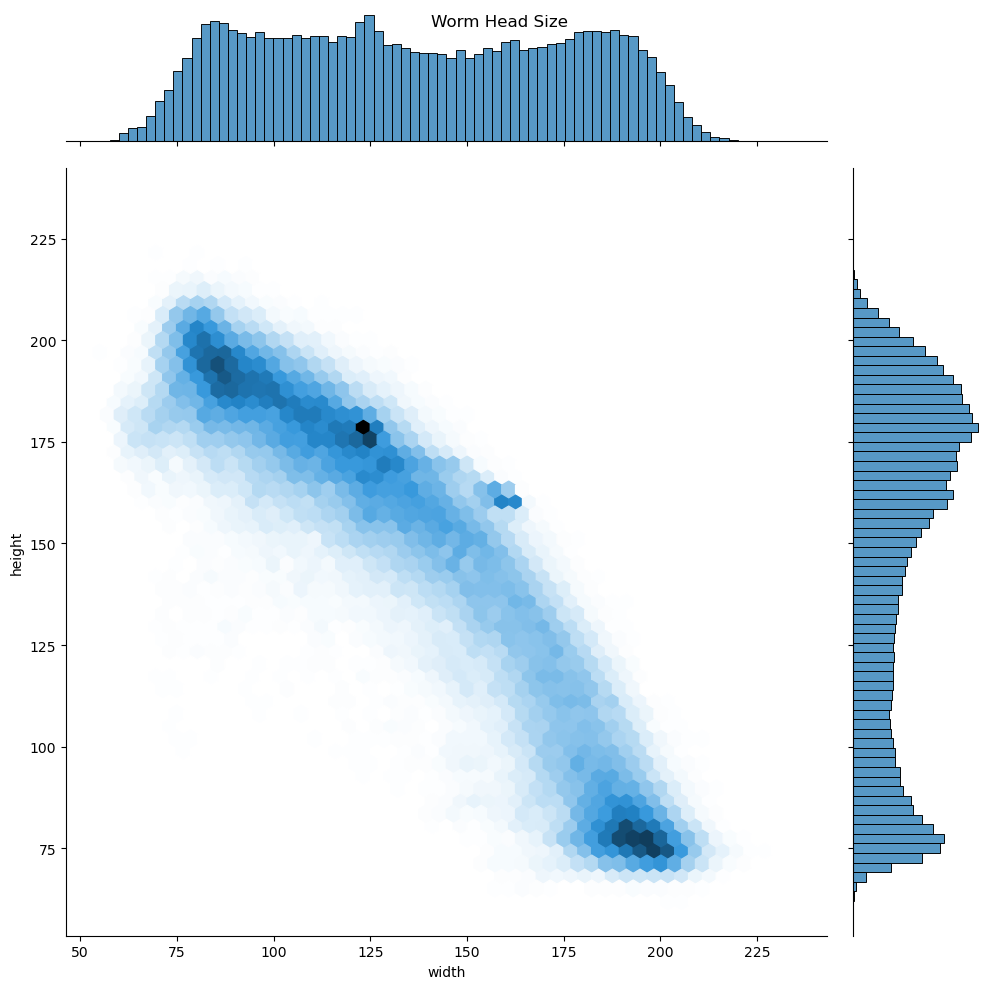

In [11]:
pltr.plot_head_size()

In [12]:
np.set_printoptions(suppress=True, precision=3)
pltr.describe(columns=["bbox_error", "worm_deviation"], num=9)

,bbox_error,worm_deviation
count,195397.000,195397.000
mean,0.109,36.999
std,0.161,33.627
min,-0.000,0.043
10%,-0.000,6.331
20%,-0.000,9.904
30%,0.000,13.914
40%,0.000,19.082
50%,0.020,26.437
60%,0.072,35.936


In [13]:
raise Exception("Finished")

Exception: Finished

In [ ]:
time_config.save_json("logs/time_config.json")

In [ ]:
from pprint import pprint

pprint(time_config)

In [ ]:
poly_config = PolyfitConfig(
    degree=1,
    sample_times=[
        0,
        5,
        9,
        -time_config.cycle_frame_num + 0,
        -time_config.cycle_frame_num + 5,
        -time_config.cycle_frame_num + 9,
        -2 * time_config.cycle_frame_num + 0,
        -2 * time_config.cycle_frame_num + 5,
        -2 * time_config.cycle_frame_num + 9,
    ],
    weights=[0.064, 0.0, 0.0, 0.001, 0.0, 0.001, 0.698, 0.0, 0.713],
)

In [ ]:
from sim.motor_controllers import *
from sim.sim_controllers import *
import torch

# sim_controller = YoloController(time_config, yolo_config)
# sim_controller = SpeedController(time_config, input_bboxes_path)
sim_controller = PolyfitController(time_config, poly_config, input_bboxes_path)
# sim_controller = OptimalController(time_config, input_bboxes_path)
# sim_controller = CsvController(time_config, input_bboxes_path)
model = torch.load("data/mlpRELU")
sim_controller = MLPController(time_config, input_bboxes_path, model)
log_controller = LoggingController(sim_controller, log_config)

motor = SineMotorController(time_config)
sim = Simulator(
    time_config,
    experiment_config,
    log_controller,
    reader=None,
    motor_controller=motor,
)

In [ ]:
sim.run(visualize=False, wait_key=False)

In [ ]:
from eval.analysis import Plotter
from sim.config import *

pltr = Plotter(f"logs/bboxes.csv", time_config)
pltr.plot_area_vs_speed(min_speed=0.0)

In [ ]:
plot = pltr.plot_deviation(n=12)

In [ ]:
pltr.plot_jointplot(x_col="wrm_w", y_col="wrm_h", kind="hist")

In [ ]:
pltr.plot_histogram("wrm_speed", 10)

In [ ]:
cv.destroyAllWindows()
raise Exception("Finished")